<a href="https://colab.research.google.com/github/Muhammed-Shaahidh/Heart_Attack_Prediction/blob/master/Model_Training_IT24610823/MLP_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install gradio joblib pandas scikit-learn

**Multi Layer Perceptron (MLP)**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import gradio as gr


from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve
)
from google.colab import files

In [5]:
!git clone https://github.com/Muhammed-Shaahidh/Heart_Attack_Prediction.git

Cloning into 'Heart_Attack_Prediction'...
remote: Enumerating objects: 241, done.
remote: Counting objects: 100% (92/92), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 241 (delta 42), reused 9 (delta 9), pack-reused 149 (from 1)
Receiving objects: 100% (241/241), 958.16 KiB | 9.13 MiB/s, done.
Resolving deltas: 100% (98/98), done.


In [6]:
output_base_dir = "/content/Heart_Attack_Prediction/Model_Training"

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/Muhammed-Shaahidh/Heart_Attack_Prediction/refs/heads/master/Data/Preprocessed_Data.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group,high_chol
0,28.0,1.0,2.0,130.0,132.0,0.0,0.0,185.0,0.0,0.0,2.0,0.0,7.0,0.0,<30,0
1,29.0,1.0,2.0,120.0,243.0,0.0,0.0,160.0,0.0,0.0,2.0,0.0,7.0,0.0,<30,1
2,29.0,1.0,2.0,140.0,230.0,0.0,0.0,170.0,0.0,0.0,2.0,0.0,7.0,0.0,<30,0
3,30.0,0.0,1.0,170.0,237.0,0.0,0.0,170.0,0.0,0.0,2.0,0.0,7.0,0.0,<30,0
4,31.0,0.0,2.0,100.0,219.0,0.0,0.0,150.0,0.0,0.0,2.0,0.0,7.0,0.0,30-39,0


**Choose features and target**

In [8]:
drop_cols = ['age_group']  # drop only age_group
X = df.drop(['target', *drop_cols], axis=1)
y = df['target']

**Split into Train/Test**

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Scale Features**

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

**Hyperparameter tuning with GridSearchCV**

In [26]:
param_grid = {
    'hidden_layer_sizes': [(32, 16), (64, 32, 16)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'max_iter': [300]
}
mlp = MLPClassifier(random_state=42)
grid = GridSearchCV(
    mlp,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train_scaled, y_train)
print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (64, 32, 16), 'max_iter': 300, 'solver': 'sgd'}
Best CV Score: 0.8250693802035153


**Manual Hyperparameter Tuning**

In [54]:
# Define the parameter grid
hidden_layer_options = [(64, 128), (64, 32, 16)]
activation_options = ['relu', 'tanh']
solver_options = ['adam', 'sgd']
alpha_options = [0.0001, 0.001]
max_iter_options = [300]

# Store results
results = []

best_score = 0
best_params = {}

# Manual parameter search
for hidden_layers in hidden_layer_options:
    for activation in activation_options:
        for solver in solver_options:
            for alpha in alpha_options:
                for max_iter in max_iter_options:

                    # Create model
                    mlp = MLPClassifier(
                        hidden_layer_sizes=hidden_layers,
                        activation=activation,
                        solver=solver,
                        alpha=alpha,
                        max_iter=max_iter,
                        random_state=42
                    )

                    # Cross-validation accuracy
                    scores = cross_val_score(mlp, X_train_scaled, y_train, cv=5, scoring='accuracy')
                    mean_score = np.mean(scores)

                    # Store all results
                    results.append({
                        'Hidden Layers': hidden_layers,
                        'Activation': activation,
                        'Solver': solver,
                        'Alpha': alpha,
                        'Max Iter': max_iter,
                        'CV Accuracy': round(mean_score, 4)
                    })

                    # Track best params
                    if mean_score > best_score:
                        best_score = mean_score
                        best_params = {
                            'Hidden Layers': hidden_layers,
                            'Activation': activation,
                            'Solver': solver,
                            'Alpha': alpha,
                            'Max Iter': max_iter
                        }

# Convert results into DataFrame for summary table
df_summary = pd.DataFrame(results)
df_summary = df_summary.sort_values(by='CV Accuracy', ascending=False).reset_index(drop=True)

print("✅ Best Parameters Found:")
print(best_params)
print(f"✅ Best Cross-Validation Accuracy: {best_score:.4f}\n")

print("📊 Summary of All Parameter Combinations:\n")
print(df_summary)



/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptro

✅ Best Parameters Found:
{'Hidden Layers': (64, 128), 'Activation': 'tanh', 'Solver': 'sgd', 'Alpha': 0.0001, 'Max Iter': 300}
✅ Best Cross-Validation Accuracy: 0.8378

📊 Summary of All Parameter Combinations:

   Hidden Layers Activation Solver   Alpha  Max Iter  CV Accuracy
0      (64, 128)       tanh    sgd  0.0001       300       0.8378
1      (64, 128)       tanh    sgd  0.0010       300       0.8378
2   (64, 32, 16)       tanh    sgd  0.0010       300       0.8251
3   (64, 32, 16)       tanh    sgd  0.0001       300       0.8251
4      (64, 128)       relu    sgd  0.0010       300       0.8165
5      (64, 128)       relu    sgd  0.0001       300       0.8165
6   (64, 32, 16)       relu    sgd  0.0001       300       0.8164
7   (64, 32, 16)       relu    sgd  0.0010       300       0.8164
8   (64, 32, 16)       relu   adam  0.0001       300       0.7779
9      (64, 128)       tanh   adam  0.0010       300       0.7695
10     (64, 128)       tanh   adam  0.0001       300       0.76

**Train best model on full training set**

Manual

In [49]:
best_model = MLPClassifier(
    hidden_layer_sizes=best_params['Hidden Layers'],
    activation=best_params['Activation'],
    solver=best_params['Solver'],
    alpha=best_params['Alpha'],
    max_iter=best_params['Max Iter'],
    random_state=42
)

# Fit the model on the full training set
best_model.fit(X_train_scaled, y_train)

# Optional: check accuracy on training and test sets
train_accuracy = best_model.score(X_train_scaled, y_train)
print(f"✅ Training Accuracy: {train_accuracy:.4f}")

if 'X_test_scaled' in globals() and 'y_test' in globals():
    test_accuracy = best_model.score(X_test_scaled, y_test)
    print(f"✅ Test Accuracy: {test_accuracy:.4f}")

✅ Training Accuracy: 0.8291
✅ Test Accuracy: 0.8644


Auto

In [51]:
best_mlp = grid.best_estimator_
best_mlp.fit(X_train_scaled, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(64, 32, 16), max_iter=300,
              random_state=42, solver='sgd')

**Training and Validation Accuracy**

Training Accuracy: 83.76%
Validation Accuracy: 86.44%


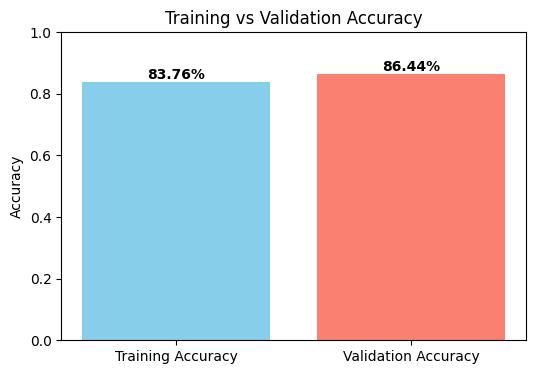

In [40]:
train_accuracy = best_mlp.score(X_train_scaled, y_train)
val_accuracy = best_mlp.score(X_test_scaled, y_test)
print(f"Training Accuracy: {train_accuracy*100:.2f}%")
print(f"Validation Accuracy: {val_accuracy*100:.2f}%")

accuracies = [train_accuracy, val_accuracy]
labels = ['Training Accuracy', 'Validation Accuracy']

plt.figure(figsize=(6,4))
plt.bar(labels, accuracies, color=['skyblue', 'salmon'])
plt.ylim([0,1])
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v*100:.2f}%", ha='center', fontweight='bold')
plt.show()

**Prediction**

In [14]:
y_pred = best_mlp.predict(X_test_scaled)
y_prob = best_mlp.predict_proba(X_test_scaled)[:, 1]

**Confution Matrix**

Confusion Matrix:
 [[35  6]
 [ 2 16]]


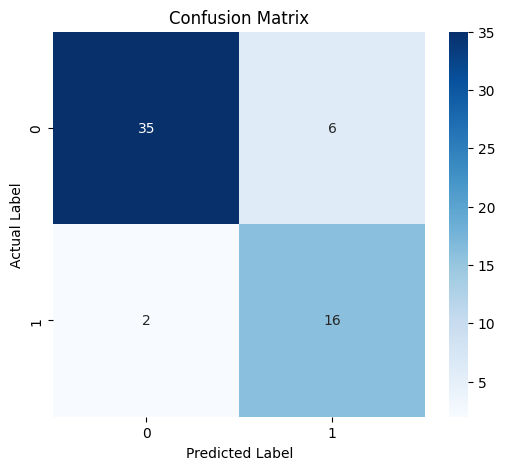

In [15]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

**Classification Report & Metrics**

In [16]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"AUC: {auc:.3f}")


Classification Report:
               precision    recall  f1-score   support

         0.0       0.95      0.85      0.90        41
         1.0       0.73      0.89      0.80        18

    accuracy                           0.86        59
   macro avg       0.84      0.87      0.85        59
weighted avg       0.88      0.86      0.87        59

Accuracy: 0.864
Precision: 0.727
Recall: 0.889
F1 Score: 0.800
AUC: 0.947


**Plot Loss Curve**

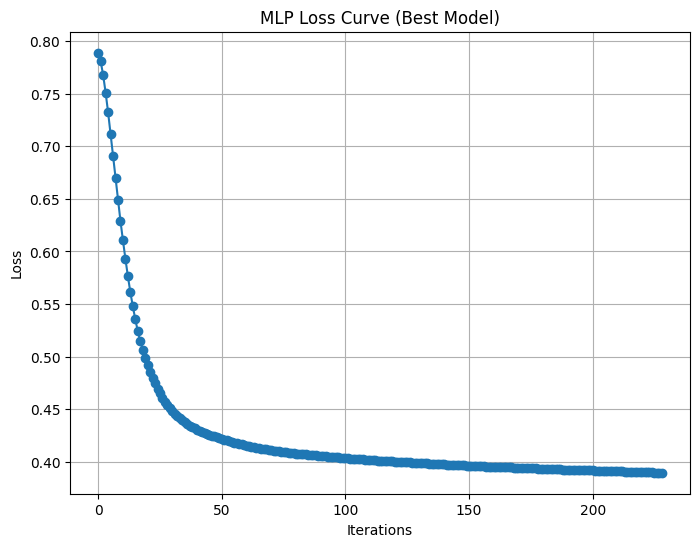

In [17]:
plt.figure(figsize=(8,6))
plt.plot(best_mlp.loss_curve_, marker='o')
plt.title('MLP Loss Curve (Best Model)')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

**Plot ROC Curve**

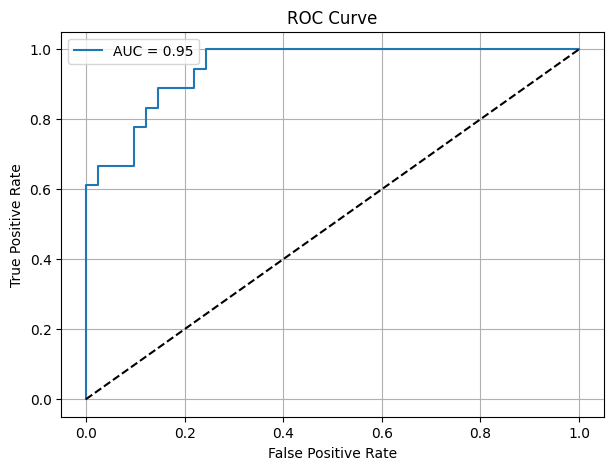

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

**Cross-validation scores for best model**

Cross-Validated Accuracy Scores: [0.74468085 0.85106383 0.82978723 0.80851064 0.89130435]
Mean CV Accuracy: 0.825


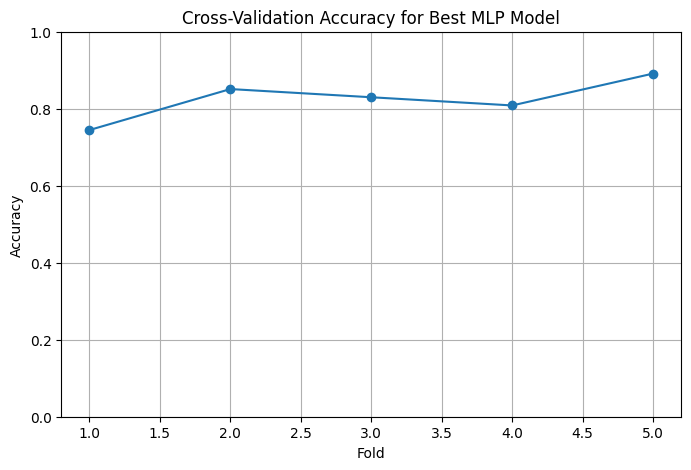

In [19]:
cv_scores = cross_val_score(
    best_mlp, X_train_scaled, y_train, cv=5, scoring='accuracy'
)
print(f"Cross-Validated Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {np.mean(cv_scores):.3f}")

plt.figure(figsize=(8,5))
plt.plot(range(1, 6), cv_scores, marker='o')
plt.title('Cross-Validation Accuracy for Best MLP Model')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.grid(True)
plt.show()

**Mean accuracy of all models tested in GridSearchCV**

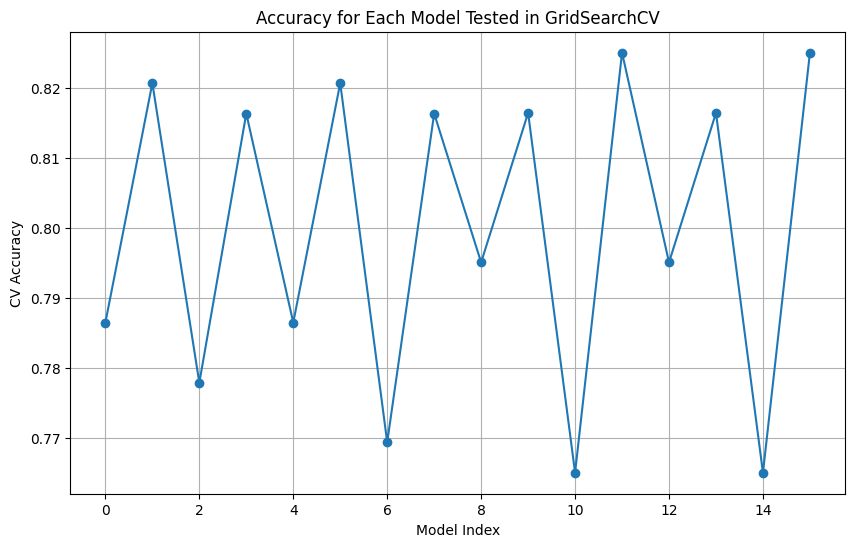

In [20]:
mean_acc = grid.cv_results_['mean_test_score']
plt.figure(figsize=(10,6))
plt.plot(mean_acc, marker='o')
plt.title('Accuracy for Each Model Tested in GridSearchCV')
plt.xlabel('Model Index')
plt.ylabel('CV Accuracy')
plt.grid(True)
plt.show()

**Save the trained model to a file**

In [21]:
joblib.dump(best_mlp, 'mlp_model.pkl')

['mlp_model.pkl']

**Download Model**

In [22]:
# files.download('mlp_model.pkl')

**Load the Saved model**

In [23]:
loaded_mlp = joblib.load('mlp_model.pkl')

**Deploy the Model**

In [24]:
# Try to load the model and scaler, return clear error if missing
try:
    model = joblib.load('mlp_model.pkl')
except Exception as e:
    raise FileNotFoundError("Model file 'mlp_model.pkl' not found or could not be loaded. Error: " + str(e))

try:
    scaler = joblib.load('scaler.pkl')
except Exception as e:
    raise FileNotFoundError("Scaler file 'scaler.pkl' not found or could not be loaded. Error: " + str(e))

FEATURE_NAMES = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'high_chol'
]

def predict_heart_attack(
        age, sex, cp, trestbps, chol, fbs, restecg,
        thalach, exang, oldpeak, slope, ca, thal):
    try:
        # Convert all features to correct types (float or int)
        data = {
            'age': float(age),
            'sex': int(sex),
            'cp': int(cp),
            'trestbps': float(trestbps),
            'chol': float(chol),
            'fbs': int(fbs),
            'restecg': int(restecg),
            'thalach': float(thalach),
            'exang': int(exang),
            'oldpeak': float(oldpeak),
            'slope': int(slope),
            'ca': int(ca),
            'thal': int(thal),
            'high_chol': 1 if chol > 240 else 0
        }
        df = pd.DataFrame([data], columns=FEATURE_NAMES)
        scaled = scaler.transform(df)
        pred = model.predict(scaled)[0]
        prob = model.predict_proba(scaled)[0][1]
        return f"Prediction: {'Heart Disease Present' if pred==1 else 'No Heart Disease'}\nProbability: {prob:.2f}"
    except Exception as e:
        return f"Error: {str(e)}"

inputs = [
    gr.Number(label="Age (years)"),
    gr.Radio([1, 0], label="Sex (1 = male, 0 = female)", value=1),
    gr.Radio([1, 2, 3, 4], label="Chest Pain Type (1-4)", value=1),
    gr.Number(label="Resting Blood Pressure (trestbps, mm Hg)"),
    gr.Number(label="Serum Cholesterol (chol, mg/dl)"),
    gr.Radio([1, 0], label="Fasting Blood Sugar > 120 mg/dl (1 = true, 0 = false)", value=0),
    gr.Radio([0, 1, 2], label="Resting ECG Results (0-2)", value=0),
    gr.Number(label="Max Heart Rate Achieved (thalach)"),
    gr.Radio([1, 0], label="Exercise-induced Angina (1 = yes, 0 = no)", value=0),
    gr.Number(label="ST Depression (oldpeak)"),
    gr.Radio([1, 2, 3], label="Slope of Peak Exercise ST Segment (1-3)", value=1),
    gr.Radio([0, 1, 2, 3], label="Number of Major Vessels Colored by Fluoroscopy (ca, 0-3)", value=0),
    gr.Radio([3, 6, 7], label="Thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect)", value=3),
]

gr.Interface(
    fn=predict_heart_attack,
    inputs=inputs,
    outputs="text",
    title="Heart Disease Prediction",
    description="Enter patient data to predict the presence of heart disease.",
    allow_flagging="never"
).launch(share=True)

/usr/local/lib/python3.12/dist-packages/gradio/interface.py:415: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated. Use `flagging_mode` instead.
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://50de798e115dd720bd.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
